In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_car=pd.read_csv("/content/used_cars_data.csv")

In [ ]:
data_car.drop(columns=(["Unnamed: 0"]),inplace=True)

## Eda

In [ ]:
data_car

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1
...,...,...,...,...,...,...,...,...,...
787,Volkswagen,Golf,13990,Edition 1.6 TDI 110CV BMT,2016,84040,Diésel,Manual,Gavá
788,Kia,Sportage,24990,1.6 GDi 97kW (132CV) Basic 4x2,2018,65872,Gasolina,Manual,Viladecans
789,Abarth,500,17990,1.4 16v T-Jet 595 118kW (160CV) Pista E6,2019,28830,Gasolina,Manual,Mataró
790,Volkswagen,Tiguan,14990,2.0 TDI 177cv DSG 4x4 Sport BMotion Tech,2014,162895,Diésel,Automatica,Mataró


### Transformation data

In [ ]:
def transformation_Euro_to_Rp(currency):
  # Use currency in 17,02-2023 
  # 1 euro is Rp 16.157
  currency=16157*currency
  return currency

In [ ]:
data_car["Price_Rp"]=data_car["price (eur)"].apply(transformation_Euro_to_Rp)

In [ ]:
data_car

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location,Price_Rp
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers,145251430
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans,161408430
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans,217957930
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans,403763430
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1,169002220
...,...,...,...,...,...,...,...,...,...,...
787,Volkswagen,Golf,13990,Edition 1.6 TDI 110CV BMT,2016,84040,Diésel,Manual,Gavá,226036430
788,Kia,Sportage,24990,1.6 GDi 97kW (132CV) Basic 4x2,2018,65872,Gasolina,Manual,Viladecans,403763430
789,Abarth,500,17990,1.4 16v T-Jet 595 118kW (160CV) Pista E6,2019,28830,Gasolina,Manual,Mataró,290664430
790,Volkswagen,Tiguan,14990,2.0 TDI 177cv DSG 4x4 Sport BMotion Tech,2014,162895,Diésel,Automatica,Mataró,242193430


### view car based on  gearbox

In [ ]:
data_type_car_gearbox=data_car[["brand","gearbox"]]

In [ ]:
data_type_car_gearbox.groupby(by=["brand"])["gearbox"].value_counts()

brand       gearbox   
Abarth      Manual         6
            Automatica     3
Alfa        Manual         3
            Automatica     1
Audi        Manual        23
                          ..
Toyota      Manual        17
Volkswagen  Manual        28
            Automatica    23
Volvo       Manual         3
            Automatica     1
Name: gearbox, Length: 62, dtype: int64

In [ ]:
data_type_car_gearbox

,brand,gearbox
0,SEAT,Manual
1,Hyundai,Manual
2,BMW,Automatica
3,Volkswagen,Manual
4,Opel,Manual
...,...,...
787,Volkswagen,Manual
788,Kia,Manual
789,Abarth,Manual
790,Volkswagen,Automatica


In [ ]:
data_car["fuel"].unique()

array(['Gasolina', 'Diésel', 'Híbrido', 'GLP', 'Eléctrico'], dtype=object)

In [ ]:
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["gearbox"], margins=True)).reset_index()
    # tab['Percentage'] = tab[1] / tab['All'] * 100
    tab.columns = [var, 'Automatica', 'Manual','All']
    return tab

In [ ]:
data_brand_type_gearbox=crosstab_function(data_type_car_gearbox,"brand")

In [ ]:
data_brand_type_gearbox

,brand,Automatica,Manual,All
0,Abarth,3,6,9
1,Alfa,1,3,4
2,Audi,21,23,44
3,BMW,34,23,57
4,Chevrolet,0,1,1
5,Citroen,3,39,42
6,Cupra,1,1,2
7,DS,0,1,1
8,Dacia,0,14,14
9,Fiat,1,21,22


In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(data_brand_type_gearbox[0:36], x='brand', y=['Automatica',"Manual"])
fig.show()

The brand have most manual gearbox is `SEAT`
<br> `Chevrolet` and `DS` just have one 1 manual gearbox
<br> `Porsche` just have gearbox automatic

### Statistical describe

In [ ]:
data_car["Price_Rp"].describe()

count    7.920000e+02
mean     2.580820e+08
std      1.128460e+08
min      8.062343e+07
25%      1.834627e+08
50%      2.421934e+08
75%      2.987429e+08
max      1.334245e+09
Name: Price_Rp, dtype: float64

In [ ]:
data_car.describe()

,price (eur),year,mileage (kms),Price_Rp
count,792.000000,792.000000,792.000000,7.920000e+02
mean,15973.383838,2016.404040,83228.833333,2.580820e+08
std,6984.338370,2.452251,46202.118589,1.128460e+08
min,4990.000000,2004.000000,1258.000000,8.062343e+07
25%,11355.000000,2015.000000,47145.500000,1.834627e+08
50%,14990.000000,2017.000000,80065.500000,2.421934e+08
75%,18490.000000,2018.000000,116321.750000,2.987429e+08
max,82580.000000,2021.000000,220000.000000,1.334245e+09


In [ ]:
data_car.describe(include='object')

,brand,model,engine,fuel,gearbox,location
count,792,792,792,792,792,792
unique,36,206,694,5,2,10
top,SEAT,Leon,1.0 Ecoboost 92kW ST-Line,Diésel,Manual,Sabadell 1
freq,84,32,8,377,559,123


Brand most in this data is `SEAT` have 84 frequency  <br>
gearbox most in this data is `Manual` have 559 frequency  <br>


# Clustering

In [ ]:
data_car["location"].unique()	

array(['Granollers', 'Viladecans', 'Sabadell 1', 'Gavá', 'Mataró',
       'Sabadell 2', 'Esplugas', 'Hospitalet', 'Badalona', 'Sabadell 3'],
      dtype=object)

In [ ]:
data_car["year"].unique()	

array([2016, 2014, 2011, 2018, 2017, 2020, 2015, 2019, 2012, 2021, 2013,
       2010, 2007, 2008, 2009, 2004])

In [ ]:
data_car_for_clustering=data_car.drop(columns=(["year","price (eur)"]))

## one hot encoding

In [ ]:
data_car_for_clustering.head(3)

,brand,model,engine,mileage (kms),fuel,gearbox,location,Price_Rp
0,SEAT,Ibiza,SC 1.2 TSI 90cv Style,67000,Gasolina,Manual,Granollers,145251430
1,Hyundai,i30,1.6 CRDi 110cv Tecno,104868,Diésel,Manual,Viladecans,161408430
2,BMW,Serie 5,530d Touring,137566,Diésel,Automatica,Viladecans,217957930


In [ ]:
data_car_for_clustering=pd.get_dummies(data_car_for_clustering, columns=["brand","model","engine","fuel","gearbox","location"])

In [ ]:
data_car_for_clustering

,mileage (kms),Price_Rp,brand_Abarth,brand_Alfa,brand_Audi,brand_BMW,brand_Chevrolet,brand_Citroen,brand_Cupra,brand_DS,...,location_Badalona,location_Esplugas,location_Gavá,location_Granollers,location_Hospitalet,location_Mataró,location_Sabadell 1,location_Sabadell 2,location_Sabadell 3,location_Viladecans
0,67000,145251430,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,104868,161408430,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,137566,217957930,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44495,403763430,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,69800,169002220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,84040,226036430,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
788,65872,403763430,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
789,28830,290664430,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
790,162895,242193430,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
colums=[]
for v in data_car_for_clustering.columns:
  colums.append(v)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(data_car_for_clustering)

StandardScaler()

In [ ]:
df_scaled = scaler.transform(data_car_for_clustering)

In [ ]:
df_scaled=pd.DataFrame(df_scaled, columns=[colums])

In [ ]:
df_scaled

,mileage (kms),Price_Rp,brand_Abarth,brand_Alfa,brand_Audi,brand_BMW,brand_Chevrolet,brand_Citroen,brand_Cupra,brand_DS,...,location_Badalona,location_Esplugas,location_Gavá,location_Granollers,location_Hospitalet,location_Mataró,location_Sabadell 1,location_Sabadell 2,location_Sabadell 3,location_Viladecans
0,-0.351479,-1.000495,-0.107211,-0.071247,-0.242536,-0.278480,-0.035556,-0.236643,-0.050315,-0.035556,...,-0.330520,-0.313806,-0.301511,3.186680,-0.33052,-0.321036,-0.428785,-0.293972,-0.33052,-0.358057
1,0.468655,-0.857227,-0.107211,-0.071247,-0.242536,-0.278480,-0.035556,-0.236643,-0.050315,-0.035556,...,-0.330520,-0.313806,-0.301511,-0.313806,-0.33052,-0.321036,-0.428785,-0.293972,-0.33052,2.792848
2,1.176818,-0.355789,-0.107211,-0.071247,-0.242536,3.590924,-0.035556,-0.236643,-0.050315,-0.035556,...,-0.330520,-0.313806,-0.301511,-0.313806,-0.33052,-0.321036,-0.428785,-0.293972,-0.33052,2.792848
3,-0.838886,1.291792,-0.107211,-0.071247,-0.242536,-0.278480,-0.035556,-0.236643,-0.050315,-0.035556,...,-0.330520,-0.313806,-0.301511,-0.313806,-0.33052,-0.321036,-0.428785,-0.293972,-0.33052,2.792848
4,-0.290838,-0.789891,-0.107211,-0.071247,-0.242536,-0.278480,-0.035556,-0.236643,-0.050315,-0.035556,...,-0.330520,-0.313806,-0.301511,-0.313806,-0.33052,-0.321036,2.332172,-0.293972,-0.33052,-0.358057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.017568,-0.284155,-0.107211,-0.071247,-0.242536,-0.278480,-0.035556,-0.236643,-0.050315,-0.035556,...,-0.330520,-0.313806,3.316625,-0.313806,-0.33052,-0.321036,-0.428785,-0.293972,-0.33052,-0.358057
788,-0.375909,1.291792,-0.107211,-0.071247,-0.242536,-0.278480,-0.035556,-0.236643,-0.050315,-0.035556,...,-0.330520,-0.313806,-0.301511,-0.313806,-0.33052,-0.321036,-0.428785,-0.293972,-0.33052,2.792848
789,-1.178154,0.288916,9.327379,-0.071247,-0.242536,-0.278480,-0.035556,-0.236643,-0.050315,-0.035556,...,-0.330520,-0.313806,-0.301511,-0.313806,-0.33052,3.114916,-0.428785,-0.293972,-0.33052,-0.358057
790,1.725386,-0.140887,-0.107211,-0.071247,-0.242536,-0.278480,-0.035556,-0.236643,-0.050315,-0.035556,...,-0.330520,-0.313806,-0.301511,-0.313806,-0.33052,3.114916,-0.428785,-0.293972,-0.33052,-0.358057


In [ ]:
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_scaled)
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names th

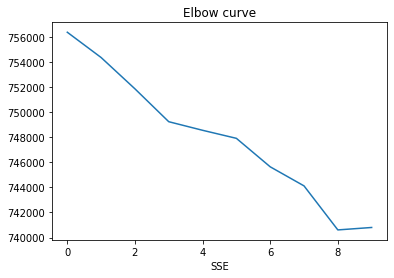

In [ ]:
plt.plot(sse)
plt.xlabel("Cluster numbering")
plt.xlabel("SSE");
plt.title("Elbow curve");

In [ ]:
fig = px.line(sse,title="Elbow curve")
fig.show()

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import DataGenerator, KneeLocator

In [ ]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
best_cluster=kl.elbow
print(f'best SSE in cluster -> {best_cluster}')

best SSE in cluster -> 4


In [ ]:
kmens=KMeans(n_clusters=best_cluster)
kmens.fit(df_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



KMeans(n_clusters=4)

In [ ]:
data_car_for_clustering["Cluster"]=kmens.labels_

In [ ]:
data_car_for_clustering

,mileage (kms),Price_Rp,brand_Abarth,brand_Alfa,brand_Audi,brand_BMW,brand_Chevrolet,brand_Citroen,brand_Cupra,brand_DS,...,location_Esplugas,location_Gavá,location_Granollers,location_Hospitalet,location_Mataró,location_Sabadell 1,location_Sabadell 2,location_Sabadell 3,location_Viladecans,Cluster
0,67000,145251430,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
1,104868,161408430,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
2,137566,217957930,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,44495,403763430,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,69800,169002220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,84040,226036430,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
788,65872,403763430,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
789,28830,290664430,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
790,162895,242193430,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
